In [1]:
import pandas as pd
import os,random,math,datetime
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import datetime as dt
import pandas_datareader.data as web

## Importing the data 

In [4]:
#start = dt.datetime(2000,1,1)
#end = dt.datetime(2020,12,31)

#df = web.DataReader('GOOGL','yahoo',start,end)

#df.to_csv('GOOGL.csv')

In [5]:
df = pd.read_csv('GOOGL.csv')

df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3789,2019-09-09,1220.550049,1193.170044,1207.079956,1205.270020,1592700.0,1205.270020
3790,2019-09-10,1210.000000,1196.010010,1196.089966,1205.699951,1396100.0,1205.699951
3791,2019-09-11,1222.469971,1202.280029,1203.890015,1220.000000,1176100.0,1220.000000
3792,2019-09-12,1242.420044,1222.560059,1223.469971,1234.969971,1582200.0,1234.969971
3793,2019-09-13,1241.050049,1227.079956,1232.109985,1240.030029,1172400.0,1240.030029


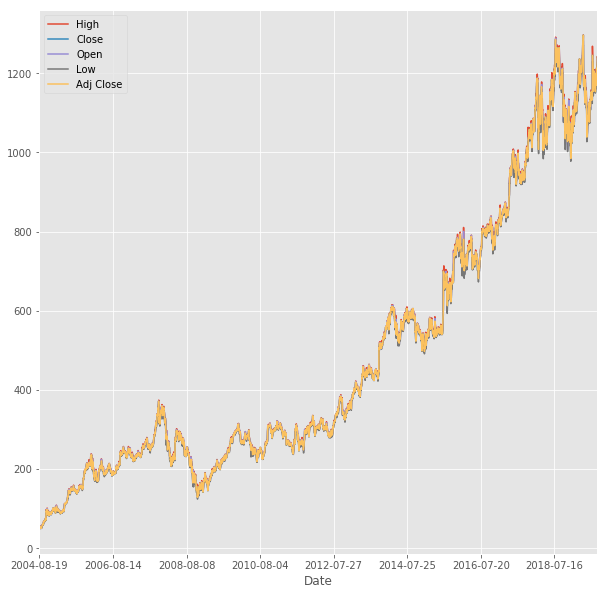

In [6]:
df.plot(kind = 'line' , x = 'Date', y = [ 'High', 'Close','Open','Low','Adj Close'], figsize =[10,10] )

In [7]:
df = pd.read_csv('GOOGL.csv',parse_dates = True , index_col =0)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


## calculation of moving average  

In [8]:
# smooth out the price over time .like 100 ma means it would take today data and then 99 previous and average it .
df['moving_avg'] = df['Adj Close'].rolling(window =100,min_periods =0 ).mean()

In [9]:
#df.dropna(inplace = True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,moving_avg
Date,,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209,52.214714
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753,53.061394
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488,52.917917
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055,52.944945


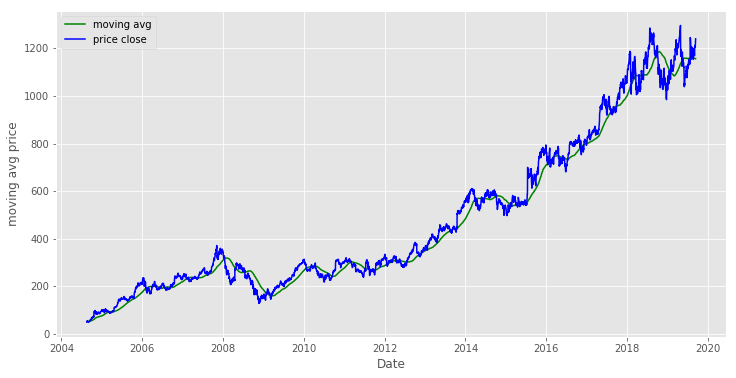

In [10]:
plt.figure(figsize = [12,6])
plt.plot(df.index,df['moving_avg'],color = 'green', label = 'moving avg')
plt.plot(df.index,df['Adj Close'],color = 'blue',label= 'price close')
plt.xlabel('Date')
plt.ylabel('moving avg price')
plt.legend()
plt.show()

In [11]:
df['Volatility'] = np.log(df['Adj Close']/ df['Adj Close'].shift())

In [12]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,moving_avg,Volatility
count,3794.000000,3794.000000,3794.000000,3794.000000,3.794000e+03,3794.000000,3794.000000,3793.000000
mean,484.226901,475.219745,479.917387,479.817444,7.236482e+06,479.817444,465.397868,0.000845
std,330.142630,324.842922,327.563366,327.638610,8.037821e+06,327.638610,319.905386,0.018863
min,50.920921,48.028027,49.644646,50.055054,5.206000e+05,50.055054,50.220219,-0.123402
25%,239.324326,234.177933,236.552799,236.537781,2.000175e+06,236.537781,236.826527,-0.007718
50%,317.267273,311.093597,314.316803,313.693695,4.521300e+06,313.693695,304.321998,0.000679
75%,723.897522,707.087509,715.717514,716.742477,9.308450e+06,716.742477,692.844272,0.009724
max,1296.969971,1271.709961,1289.119995,1296.199951,8.215110e+07,1296.199951,1186.676099,0.182251


In [13]:
# To remove trend in the time series  .it is calculated to see that data is seasonol or not 
moving_avg_diff = df['Adj Close'] - df['moving_avg']
moving_avg_diff.dropna(inplace=True)
moving_avg_diff.head()

Date
2004-08-19    0.000000
2004-08-20    1.994495
2004-08-23    1.693359
2004-08-24   -0.430429
2004-08-25    0.108110
dtype: float64

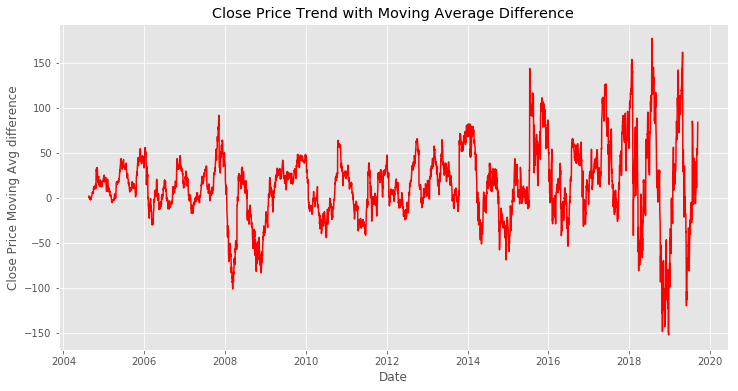

In [14]:
plt.figure(figsize=(12,6))
plt.plot(moving_avg_diff.index, moving_avg_diff, color='red')
plt.xlabel('Date')
plt.ylabel('Close Price Moving Avg difference')
plt.title('Close Price Trend with Moving Average Difference')
plt.show()

## Prediction 

In [15]:
df = pd.read_csv('GOOGL.csv',parse_dates = True , index_col =0)

df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


In [16]:
df = df.drop(['Adj Close'],1)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0


In [17]:
df.shape

(3794, 5)

In [18]:
new_data = 'Close'
df.fillna(df['Close'].mean(),inplace = True)
prediction = int(math.ceil((df['Close'].sum())/500 *0.05)) 
print(prediction)
df['label'] = df[new_data].shift(-prediction)  

print(df.head())
print(df.tail())


183
                 High        Low       Open      Close      Volume       label
Date                                                                          
2004-08-19  52.082081  48.028027  50.050049  50.220219  44659000.0  115.760757
2004-08-20  54.594593  50.300301  50.555557  54.209209  22834300.0  114.474472
2004-08-23  56.796795  54.579578  55.430431  54.754753  18256100.0  114.734734
2004-08-24  55.855854  51.836838  55.675674  52.487488  15247300.0  115.640640
2004-08-25  54.054054  51.991993  52.532532  53.053055   9188600.0  116.681679
                   High          Low         Open        Close     Volume  \
Date                                                                        
2019-09-09  1220.550049  1193.170044  1207.079956  1205.270020  1592700.0   
2019-09-10  1210.000000  1196.010010  1196.089966  1205.699951  1396100.0   
2019-09-11  1222.469971  1202.280029  1203.890015  1220.000000  1176100.0   
2019-09-12  1242.420044  1222.560059  1223.469971  1234.96

In [41]:
X=np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
X_lately = X[-prediction:]

print(X_lately.shape)
X = X[:-prediction]

df.dropna(inplace=True)
y = np.array(df['label'])


(183, 6)


In [20]:
train_X,test_X,train_y,test_y = train_test_split(X, y, test_size=0.3,random_state =100)

train_X.shape


(2527, 5)

## linear regression

In [21]:
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# Print the intercept and coefficients
print(model.intercept_)
print(model.coef_)

537.1030096555259
[-413.20726605 1006.93209994 -161.28676343  -88.37931914   -4.35665139]


In [23]:
model.score(test_X,test_y)

0.9460988391620565

In [24]:
print(prediction)

183


In [25]:
preds = model.predict(test_X)
rms=np.sqrt(np.mean(np.power((np.array(test_y)-np.array(preds)),2)))
rms

75.47411401167672

In [26]:
predict = model.predict(test_X)

[1004.12850258 1052.29351211 1029.24192514 1052.36234463 1132.82999995
 1107.92624316 1099.11785559 1079.29816141 1096.71329877 1154.88229946
 1154.55240291 1175.60762106 1167.57372966 1156.29921036 1162.26204366
 1131.20704274 1201.05883099 1187.17104308 1202.28678658 1152.17152049
 1152.74741522 1168.68572766 1206.64346917 1173.5814293  1165.11807566
 1173.54109754 1202.00362516 1218.6857563  1213.08993371 1210.75940992
 1192.0441763  1191.13294604 1211.51529536 1214.73563405 1213.65459595
 1236.67844626 1221.46129897 1211.70371916 1233.00920462 1211.74691907
 1192.94739003 1204.38184962 1230.23013525 1208.1774509  1215.12322085
 1231.73091486 1238.70390464 1228.79050433 1255.75974969 1282.87762244
 1239.86015927 1230.36747738 1246.5089892  1289.37676958 1324.32297144
 1311.76926469 1302.85450267 1299.49326837 1308.74519683 1295.32661947
 1328.51012362 1302.38318874 1300.44096106 1276.31189358 1251.41841648
 1277.12700125 1274.07934198 1306.20672289 1306.63791918 1323.27381544
 1334.

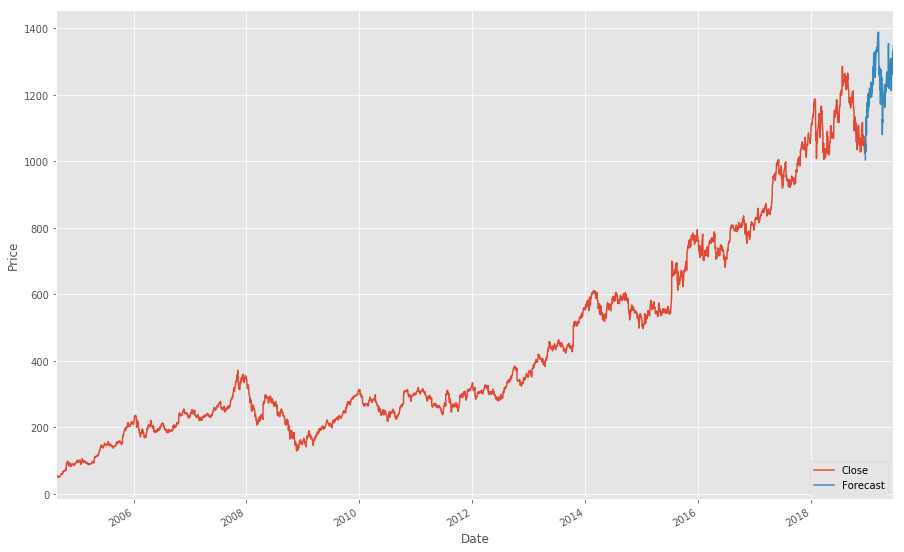

In [27]:
forecast_set = model.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
print(last_date)
last_unix = last_date.timestamp()

next_unix = last_unix + 86400 # 84600 are the number of seconds in a day 

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print(df.tail())
df['Close'].plot(figsize=[15,10])
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## at last :)


## support vector machine


In [28]:
from sklearn.svm import SVR
svr_model = SVR(kernel = 'linear')
svr_model.fit(train_X,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
pred = svr_model.predict(test_X)

In [30]:
type(pred)

numpy.ndarray

In [31]:
svr_model.score(test_X,test_y)

0.9449657429884831

Text(0.5, 0.98, 'Actual and Predicted')

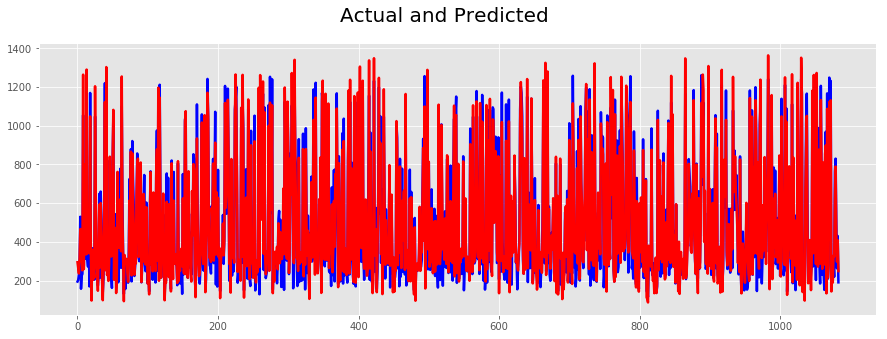

In [32]:
# Actual vs Predicted
import matplotlib.pyplot as plt       # generating index 
fig = plt.figure(figsize =[15,5])
plt.plot(test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
                      # Y-label

## SVM(polynomial)


In [33]:
from sklearn.svm import SVR
svr= SVR(kernel = 'poly')
svr.fit(train_X,train_y)
c = svr.predict(test_X)
svr.score(test_X,test_y)

0.5707625063832034

Text(0.5, 0.98, 'Actual and Predicted')

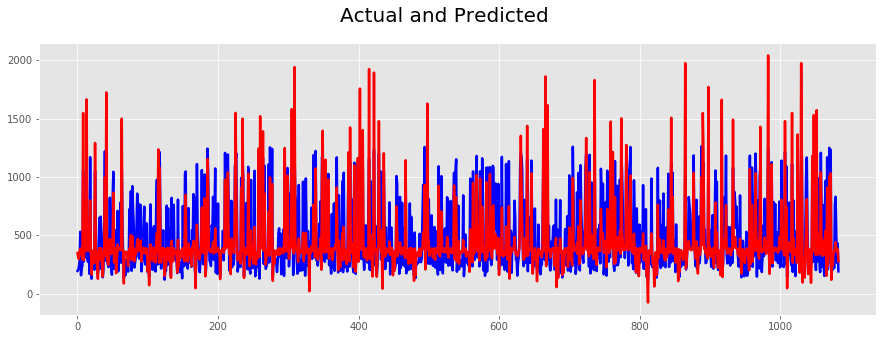

In [34]:
# Actual vs Predicted
import matplotlib.pyplot as plt       # generating index 
fig = plt.figure(figsize =[15,5])
plt.plot(test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)           

## knn classifier

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_X,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [36]:
predn = knn.predict(test_X)

In [37]:
knn.score(test_X,test_y)

0.9758465202817037

## random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor( random_state = 0 )
clf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
clf.predict(test_X)

array([228.86286316, 244.81832123, 230.49849854, ..., 265.25825348,
       311.79780121, 241.22222443])

In [40]:
clf.score(test_X,test_y)

0.974586328234297